In [ ]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras import regularizers
import matplotlib.pyplot as plt

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print("metadata:   ", census_income.metadata)
print('-----------------------------------------------------------------------')

# variable information
print("_________________________variables_________________________")
print(census_income.variables)
print('-----------------------------------------------------------------------')

# Shape
print("(Rows of Data, Features (Exluding Income)):  ", census_income.data.features.shape)
print('-----------------------------------------------------------------------')

# First 5 Rows as an Example
print("_________________________Head(5)___________________________")
X.head(5)


metadata:    {'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: (

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
print(X.info())
print()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null C

In [ ]:
print(X.describe())
print(y.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
       income
count   48842
unique      4
top     <=50K
freq   

In [ ]:
unique_values1 = X['workclass'].unique()
print("workclass:  ",unique_values1)
print()
unique_values2 = X['education'].unique()
print("education:  ",unique_values2)
print()
unique_values3 = X['marital-status'].unique()
print("marital-status:  ",unique_values3)
print()
unique_values4 = X['occupation'].unique()
print("occupation:  ",unique_values4)
print()
unique_values5 = X['relationship'].unique()
print("relationship:  ",unique_values5)
print()
unique_values6 = X['race'].unique()
print("race:  ",unique_values6)
print()
unique_values7 = X['native-country'].unique()
print("native-country:  ",unique_values7)
print()

workclass:   ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

education:   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status:   ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation:   ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

relationship:   ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race:   ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

native-country:   ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'Engla

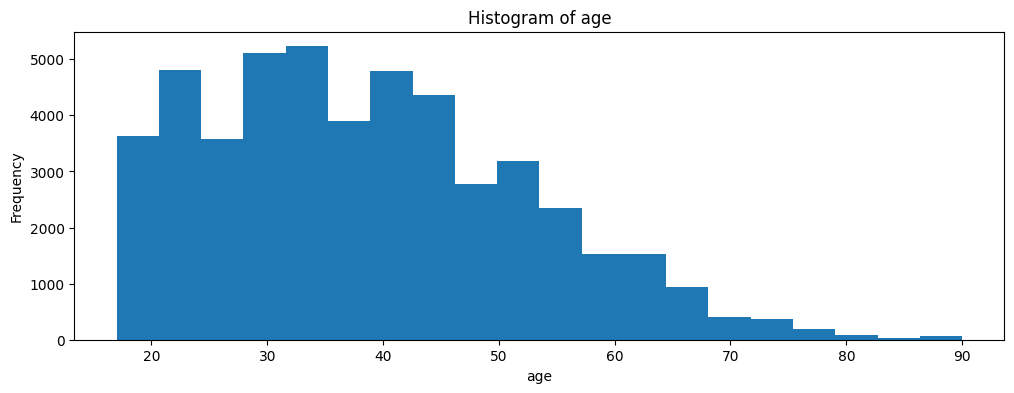

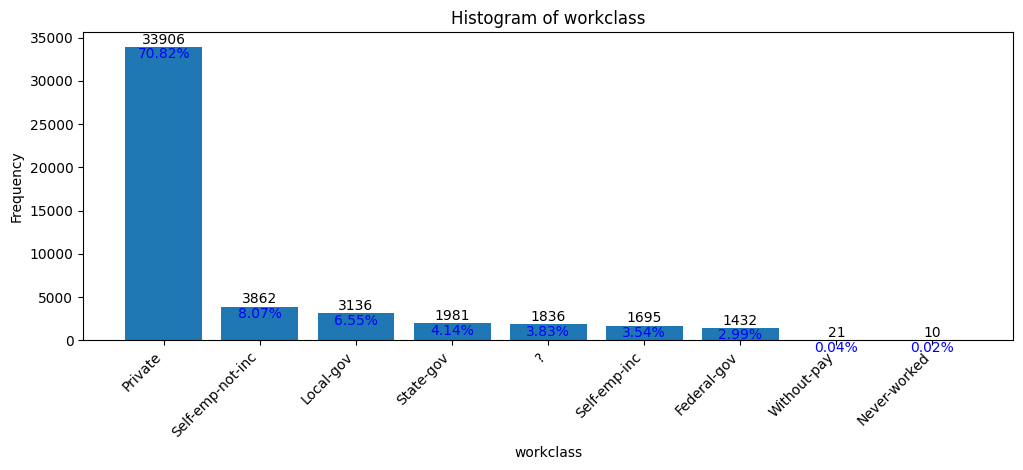

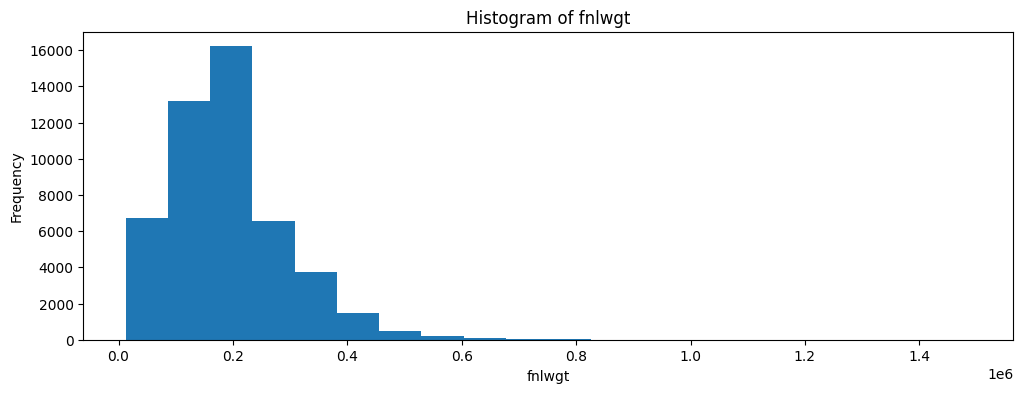

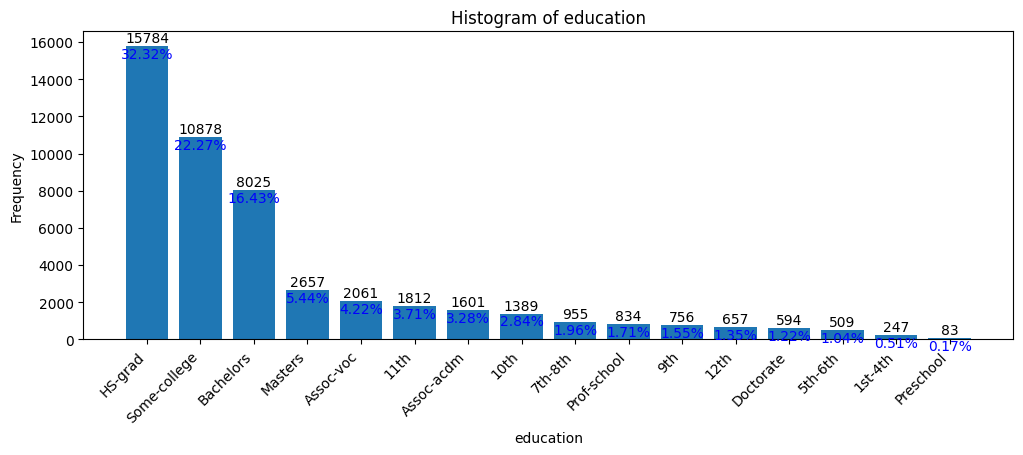

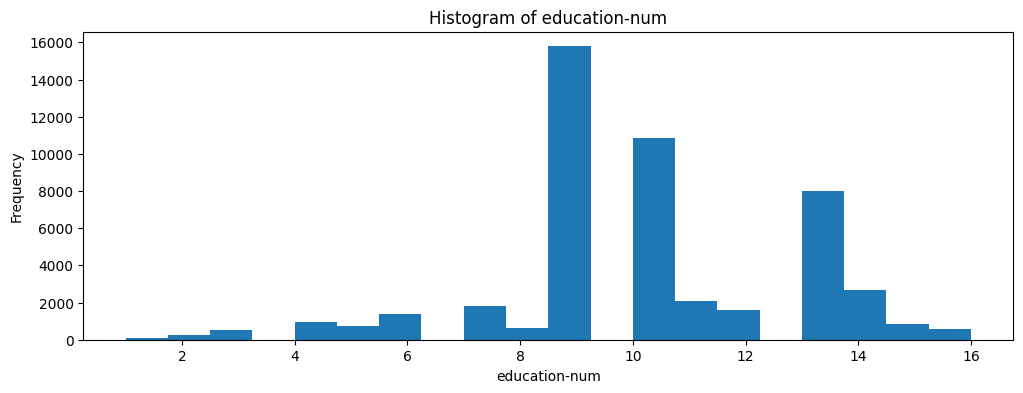

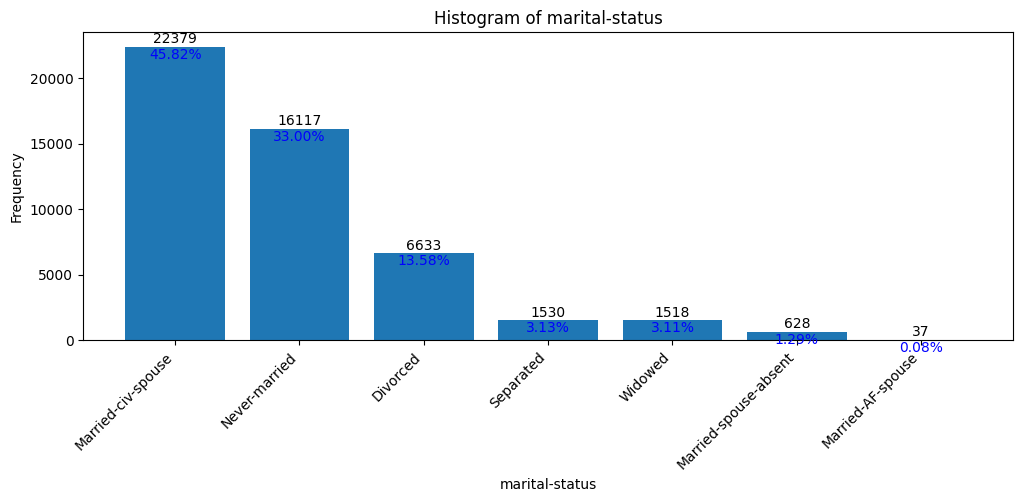

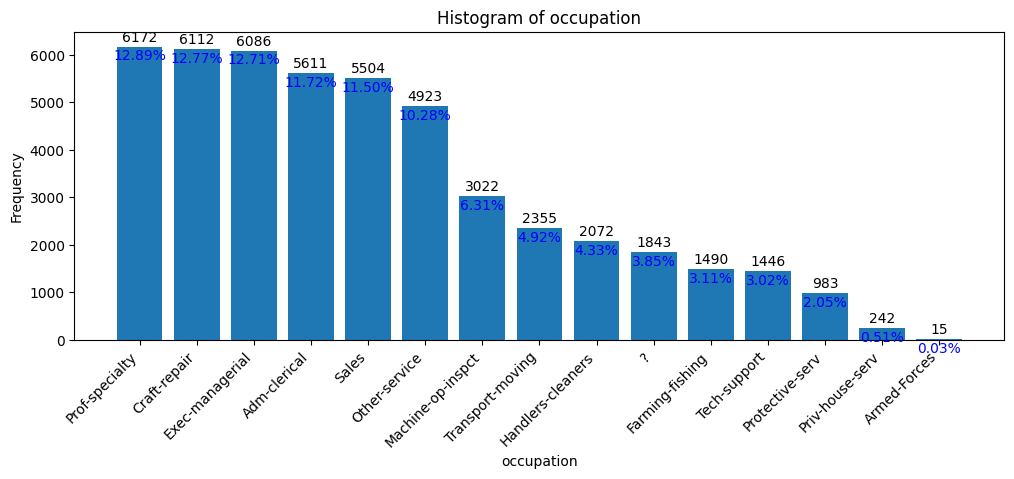

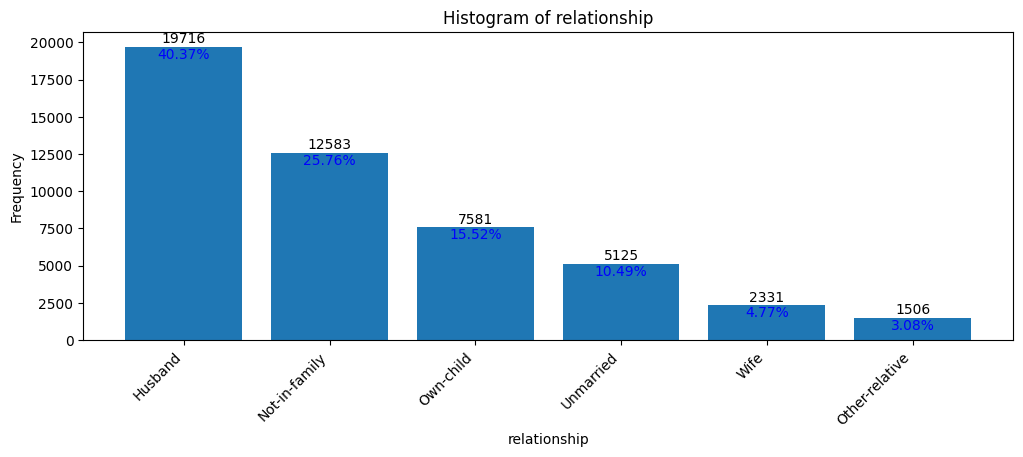

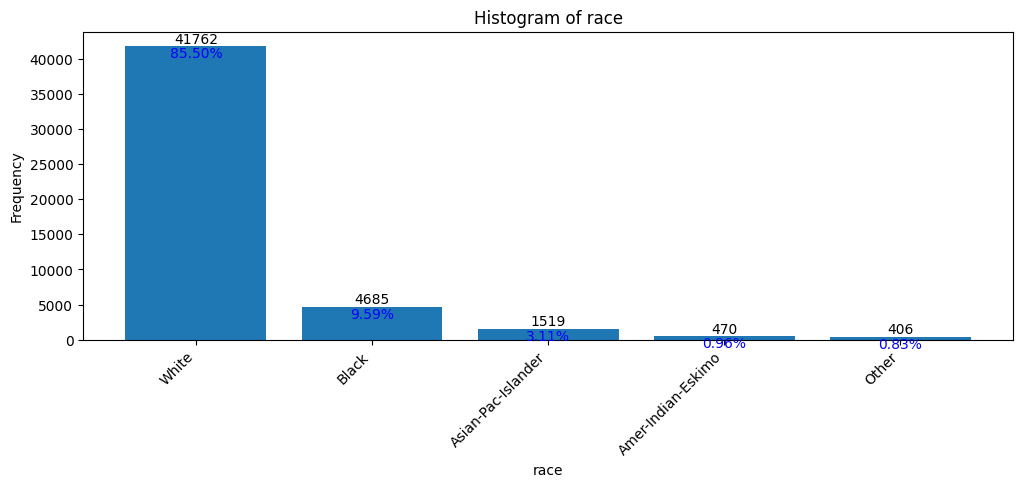

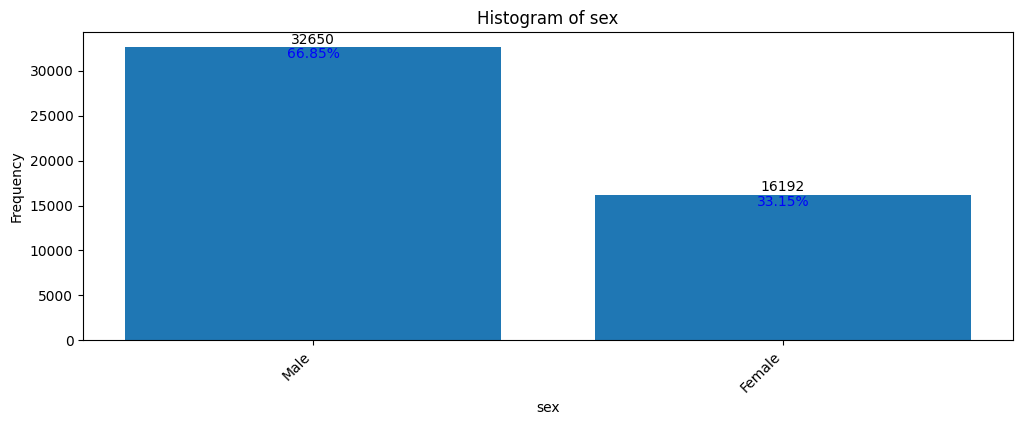

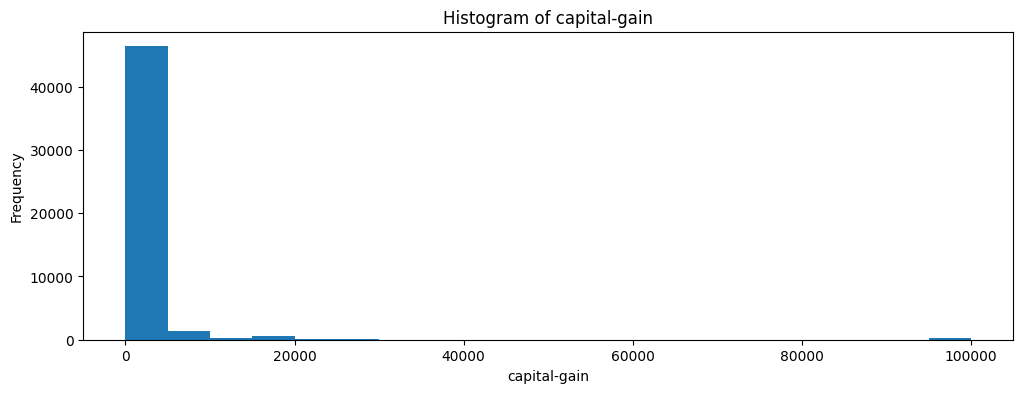

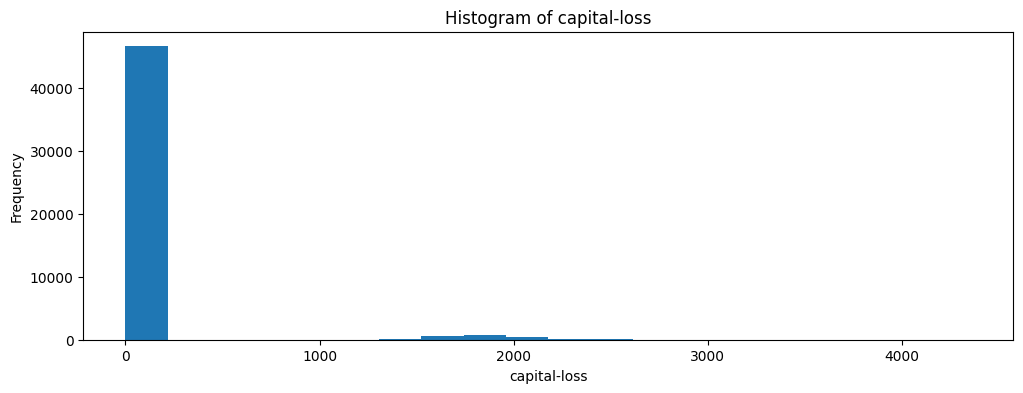

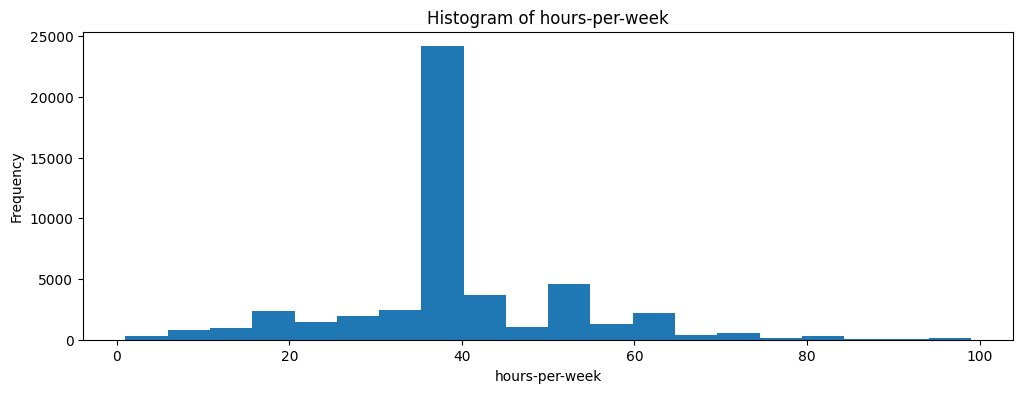

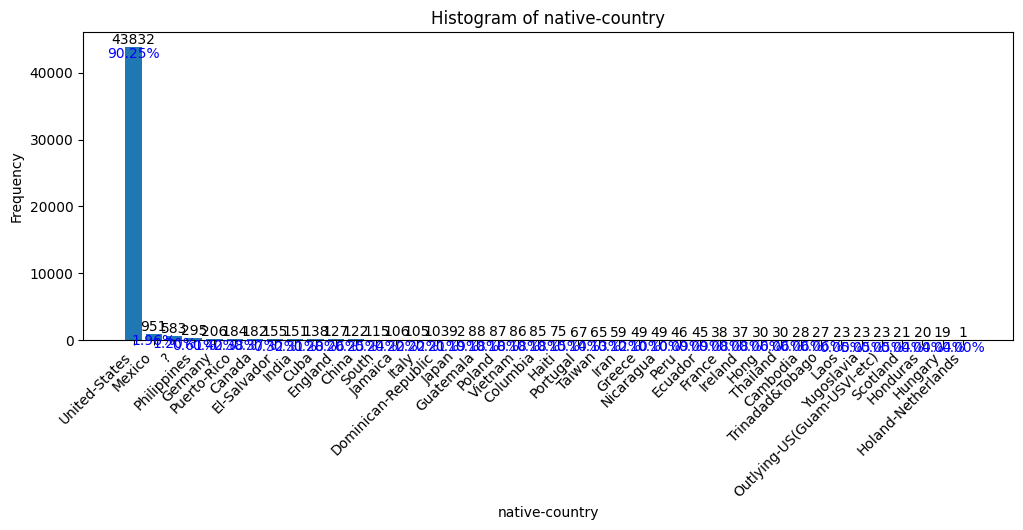

In [ ]:
# Set the size of the figure (width, height) in inches
for column in X.columns:
    # Create a histogram for the column
    plt.figure(figsize=(12, 4))

    if X[column].dtype == 'object':  # If the column contains string values
        # Count the frequency of each unique value
        value_counts = X[column].value_counts()
        total_count = value_counts.sum()  # Total count of values in the column

        # Plot a bar chart for categorical data
        bars = plt.bar(value_counts.index, value_counts)
        plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

        # Display counts above each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom') #counts for each different vaule of column
            plt.text(bar.get_x() + bar.get_width()/2, yval-50, f'{yval / total_count:.2%}', ha='center', va='top', color='blue') #blue percentages
    else:  # If the column contains numerical values
        plt.hist(X[column], bins=20)

    # Set the title and labels for the histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # Display the histogram
    plt.show()


In [5]:
#Combine the features and targets data so that a y_train can be made in the future
census_income_combined = pd.concat([X, y], axis=1)

#Perform one-hot encoding for each value within all features
census_income_combined_encoded = pd.get_dummies(census_income_combined, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])

# Iterate through each column and if a value is true change it to 1 and if false change it to 0
for col in census_income_combined_encoded.columns:
    # Check if all values in the column are boolean
    if census_income_combined_encoded[col].isin([True, False]).all():
        # Convert True/False values to 1/0
        census_income_combined_encoded[col] = census_income_combined_encoded[col].astype(int)

census_income_combined_encoded['income'] = census_income_combined_encoded['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.':1})
census_income_combined_encoded.dropna(subset=['income'], inplace=True)
census_income_combined_encoded['sex'] = census_income_combined_encoded['sex'].map({'Male':1,'Female':0})
census_income_combined_encoded.dropna(subset=['sex'], inplace=True)

print(print(census_income_combined_encoded.columns))
print('-----------------------------------------------------------------------')
print("(Rows, Features/Cols): ",census_income_combined_encoded.shape)
print('-----------------------------------------------------------------------')
print(census_income_combined_encoded.isnull().sum())
print('-----------------------------------------------------------------------')
print(census_income_combined_encoded.head(5))

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_?', 'workclass_Federal-gov',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)
None
-----------------------------------------------------------------------
(Rows, Features/Cols):  (48842, 108)
-----------------------------------------------------------------------
age                               0
fnlwgt                            0
education-num                     0
sex                               0
capital-gain                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-co

In [6]:
# Split data into train, cv, and test using sklearn's train_test_split function
# first split into 60% training and 40% test
train, test1 = train_test_split(census_income_combined_encoded, test_size=0.4, stratify=census_income_combined_encoded['income'])

# now split the test set into 50% cross validation and 50% test
cv, test = train_test_split(test1, test_size=0.5, stratify=test1['income'])

# store features in X_train and labels in y_train
X_train = train.drop('income', axis=1)
y_train = train['income']

X_cv = cv.drop('income', axis=1)
X_test = test.drop('income', axis=1)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_cv = s_scaler.transform(X_cv)  # Reusing the scaler fitted on the training set
X_test = s_scaler.transform(X_test)  # Reusing the scaler fitted on the training set

# Convert labels to numpy arrays
y_train = y_train.values
y_cv = cv['income'].values
y_test = test['income'].values

print(X_train)


[[-0.8456933   1.32517781  0.35033916 ...  0.33758268 -0.04216154
  -0.02263007]
 [-0.11775872  0.30775416  1.51190453 ... -2.96223731 -0.04216154
  -0.02263007]
 [-1.13686713 -1.22963643 -0.0368493  ...  0.33758268 -0.04216154
  -0.02263007]
 ...
 [-0.19055218  0.78387386  1.12471607 ... -2.96223731 -0.04216154
  -0.02263007]
 [-0.55451947  0.04345941  0.35033916 ...  0.33758268 -0.04216154
  -0.02263007]
 [-0.04496527 -0.66618472  1.51190453 ...  0.33758268 -0.04216154
  -0.02263007]]


In [22]:
#L1 = Lasso = Penalty to Loss Function Proportional to abs val of the weights
#L2 = Ridge = Penalty term to the loss function that is proportional to the squared value of the weights
#Dropout (Randomly Drops Neurons to Prevent Reliance)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(0.003),
               metrics=[tf.keras.metrics.BinaryAccuracy()]
              )
history=model.fit(
    X_train,y_train,
    epochs=100
)

print('\n',model.summary())

Epoch 1/100
796/796 [==============================] - 8s 7ms/step - loss: 0.3504 - binary_accuracy: 0.8380
Epoch 2/100
796/796 [==============================] - 4s 5ms/step - loss: 0.3258 - binary_accuracy: 0.8496
Epoch 3/100
796/796 [==============================] - 4s 5ms/step - loss: 0.3197 - binary_accuracy: 0.8532
Epoch 4/100
796/796 [==============================] - 5s 6ms/step - loss: 0.3156 - binary_accuracy: 0.8554
Epoch 5/100
796/796 [==============================] - 4s 5ms/step - loss: 0.3119 - binary_accuracy: 0.8565
Epoch 6/100
796/796 [==============================] - 4s 5ms/step - loss: 0.3089 - binary_accuracy: 0.8572
Epoch 7/100
796/796 [==============================] - 5s 6ms/step - loss: 0.3061 - binary_accuracy: 0.8578
Epoch 8/100
796/796 [==============================] - 4s 5ms/step - loss: 0.3038 - binary_accuracy: 0.8587
Epoch 9/100
796/796 [==============================] - 4s 5ms/step - loss: 0.2996 - binary_accuracy: 0.8602
Epoch 10/100
796/796 [======

In [23]:
#Quick Tests for Troubleshooting
# y_proba = model.predict(X_train)
print("accuracy on the training set", model.evaluate(X_train, y_train))
print()
# y_proba = model.predict(X_cv)
print("accuracy on the cross-validation set", model.evaluate(X_cv, y_cv))
print()
# y_proba = model.predict(X_test)
print("accuracy on the testing set", model.evaluate(X_test[:len(y_cv)], y_cv))

796/796 [==============================] - 2s 3ms/step - loss: 0.1331 - binary_accuracy: 0.9340
accuracy on the training set [0.13305550813674927, 0.9339852333068848]

266/266 [==============================] - 1s 3ms/step - loss: 1.3242 - binary_accuracy: 0.8199
accuracy on the cross-validation set [1.3242073059082031, 0.8198633193969727]

266/266 [==============================] - 1s 3ms/step - loss: 12.3266 - binary_accuracy: 0.6382
accuracy on the testing set [12.32664680480957, 0.6381950974464417]


In [24]:
# Predict probabilities for each class
y_proba_train = model.predict(X_train)
y_proba_cv = model.predict(X_cv)
y_proba_test = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_train = (y_proba_train > 0.5).astype(int)
y_pred_cv = (y_proba_cv > 0.5).astype(int)
y_pred_test = (y_proba_test > 0.5).astype(int)

# Accuracy

print("\nAccuracy on the training set:", accuracy_score(y_train, y_pred_train))
print("Accuracy on the cross-validation set:", accuracy_score(y_cv, y_pred_cv))
print("Accuracy on the testing set:", accuracy_score(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))
print()

# Precision
print("Precision on the training set:", precision_score(y_train, y_pred_train))
print("Precision on the cross-validation set:", precision_score(y_cv, y_pred_cv))
print("Precision on the testing set:", precision_score(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))
print()

# Recall
print("Recall on the training set:", recall_score(y_train, y_pred_train))
print("Recall on the cross-validation set:", recall_score(y_cv, y_pred_cv))
print("Recall on the testing set:", recall_score(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))
print()

# Confusion Matrix
print("Confusion Matrix on the training set:")
print(confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix on the cross-validation set:")
print(confusion_matrix(y_cv, y_pred_cv))
print("Confusion Matrix on the testing set:")
print(confusion_matrix(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))


266/266 [==============================] - 1s 2ms/step

Accuracy on the training set: 0.933985234055922
Accuracy on the cross-validation set: 0.8198633364750235
Accuracy on the testing set: 0.8202167766258247

Precision on the training set: 0.9219934994582882
Precision on the cross-validation set: 0.6580921757770632
Precision on the testing set: 0.6612200435729847

Recall on the training set: 0.8034618410700236
Recall on the cross-validation set: 0.5795186408683342
Recall on the testing set: 0.5731822474032106

Confusion Matrix on the training set:
[[18677   432]
 [ 1249  5106]]
Confusion Matrix on the cross-validation set:
[[5731  638]
 [ 891 1228]]
Confusion Matrix on the testing set:
[[5748  622]
 [ 904 1214]]


In [184]:
# Get the weights of the first layer
weights_layer1 = model.layers[0].get_weights()[0]

# Get the feature names
feature_names = census_income_combined_encoded.drop('income', axis=1).columns

# Create a dictionary to store feature importance
feature_importance = {}

# Iterate over each feature and its weight in the first layer
for feature, weight in zip(feature_names, weights_layer1):
    feature_importance[feature] = abs(weight.mean())

# Sort the dictionary by importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the top N most important features
top_n = 10  # Adjust the number of top features you want to display
print(f"\nTop {top_n} most important features:\n")
for feature, importance in sorted_feature_importance[:top_n]:
    print(f"{feature}: {importance}\n")


Top 10 most important features:

hours-per-week: 0.003902639262378216

marital-status_Married-AF-spouse: 0.002951668808236718

age: 0.002833649516105652

sex: 0.0021529379300773144

relationship_Not-in-family: 0.0018038026755675673

marital-status_Never-married: 0.0017793100560083985

marital-status_Married-spouse-absent: 0.0016651006881147623

education_5th-6th: 0.001449331408366561

occupation_Tech-support: 0.0014294260181486607

workclass_Self-emp-inc: 0.0013334174873307347



In [8]:
census_income_combined2 = pd.concat([X, y], axis=1)

# Drop '?' from 'occupation' column
census_income_combined2 = census_income_combined2[census_income_combined2['occupation'] != '?']

# Drop '?' from 'workclass' column
census_income_combined2 = census_income_combined2[census_income_combined2['workclass'] != '?']

# Define list of countries to drop from 'native-country' column
countries_to_drop = ['Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
                     'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador',
                     'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
                     'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
                     'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']

# Drop specified countries from 'native-country' column
census_income_combined2 = census_income_combined2[~census_income_combined2['native-country'].isin(countries_to_drop)]

# categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
# Optional change the missing values to the mode of the column (uncomment line above)
# for col in categorical_columns:
#     # Calculate the mode of the column
#     mode_value = X[col].mode()[0]
#     # Fill missing values with the mode
#     census_income_combined[col].fillna(mode_value, inplace=True)

census_income_combined_encoded2 = pd.get_dummies(census_income_combined2, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])

# Iterate through each column
for col in census_income_combined_encoded2.columns:
    # Check if all values in the column are boolean
    if census_income_combined_encoded2[col].isin([True, False]).all():
        # Convert True/False values to 1/0
        census_income_combined_encoded2[col] = census_income_combined_encoded2[col].astype(int)

census_income_combined_encoded2['income'] = census_income_combined_encoded2['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.':1})
census_income_combined_encoded2['sex'] = census_income_combined_encoded2['sex'].map({'Male':1,'Female':0})

columns_with_na = census_income_combined_encoded2.columns[census_income_combined_encoded2.isnull().any()]
print("Columns containing NaN values Before Drop (No Columns):")
print(columns_with_na)

print(print(census_income_combined_encoded2.columns))
print('-----------------------------------------------------------------------')
print("(Rows, Features/Cols): ",census_income_combined_encoded2.shape)
print('-----------------------------------------------------------------------')
print(census_income_combined_encoded2.isnull().sum())
print('-----------------------------------------------------------------------')
print(census_income_combined_encoded2.head(5))

Columns containing NaN values Before Drop (No Columns):
Index([], dtype='object')
Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'mari

In [9]:
# Split data into train, cv, and test using sklearn's train_test_split function
# First split into 60% training and 40% test
train, test1 = train_test_split(census_income_combined_encoded2, test_size=0.4, stratify=census_income_combined_encoded2['income'])

# Now split the test set into 50% cross-validation and 50% test
cv, test = train_test_split(test1, test_size=0.5, stratify=test1['income'])

# Store features in X_train and labels in y_train
X_train = train.drop('income', axis=1)
y_train = train['income']

X_cv = cv.drop('income', axis=1)
X_test = test.drop('income', axis=1)

# Standardize the features
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_cv = s_scaler.transform(X_cv)  # Reusing the scaler fitted on the training set
X_test = s_scaler.transform(X_test)  # Reusing the scaler fitted on the training set

# Convert labels to numpy arrays
y_train = y_train.values
y_cv = cv['income'].values
y_test = test['income'].values

# print(X_train)

In [19]:
#L1 = Lasso = Penalty to Loss Function Proportional to abs val of the weights
#L2 = Ridge = Penalty term to the loss function that is proportional to the squared value of the weights
#Dropout (Randomly Drops Neurons to Prevent Reliance)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(0.003),
               metrics=[tf.keras.metrics.BinaryAccuracy()]
              )
history=model2.fit(
    X_train,y_train,
    epochs=100
)

print('\n',model2.summary())

Epoch 1/100
796/796 [==============================] - 9s 6ms/step - loss: 0.3501 - binary_accuracy: 0.8404
Epoch 2/100
796/796 [==============================] - 6s 7ms/step - loss: 0.3276 - binary_accuracy: 0.8486
Epoch 3/100
796/796 [==============================] - 6s 7ms/step - loss: 0.3174 - binary_accuracy: 0.8533
Epoch 4/100
796/796 [==============================] - 5s 6ms/step - loss: 0.3150 - binary_accuracy: 0.8559
Epoch 5/100
796/796 [==============================] - 6s 7ms/step - loss: 0.3127 - binary_accuracy: 0.8563
Epoch 6/100
796/796 [==============================] - 5s 6ms/step - loss: 0.3095 - binary_accuracy: 0.8583
Epoch 7/100
796/796 [==============================] - 5s 6ms/step - loss: 0.3044 - binary_accuracy: 0.8589
Epoch 8/100
796/796 [==============================] - 8s 10ms/step - loss: 0.3016 - binary_accuracy: 0.8595
Epoch 9/100
796/796 [==============================] - 7s 9ms/step - loss: 0.2984 - binary_accuracy: 0.8611
Epoch 10/100
796/796 [=====

In [20]:
#Quick Tests for Troubleshooting
# y_proba = model.predict(X_train)
print("accuracy on the training set", model2.evaluate(X_train, y_train))
print()
# y_proba = model.predict(X_cv)
print("accuracy on the cross-validation set", model2.evaluate(X_cv, y_cv))
print()
# y_proba = model.predict(X_test)
print("accuracy on the testing set", model2.evaluate(X_test[:len(y_cv)], y_cv))

796/796 [==============================] - 2s 2ms/step - loss: 0.1245 - binary_accuracy: 0.9389
accuracy on the training set [0.12454025447368622, 0.9388941526412964]

266/266 [==============================] - 1s 4ms/step - loss: 1.1753 - binary_accuracy: 0.8272
accuracy on the cross-validation set [1.1752938032150269, 0.8271677494049072]

266/266 [==============================] - 1s 5ms/step - loss: 18.3884 - binary_accuracy: 0.6417
accuracy on the testing set [18.38844871520996, 0.641729474067688]


In [21]:
# Predict probabilities for each class
y_proba_train = model2.predict(X_train)
y_proba_cv = model2.predict(X_cv)
y_proba_test = model2.predict(X_test)

# Convert probabilities to binary predictions
y_pred_train = (y_proba_train > 0.5).astype(int)
y_pred_cv = (y_proba_cv > 0.5).astype(int)
y_pred_test = (y_proba_test > 0.5).astype(int)

# Accuracy

print("\nAccuracy on the training set:", accuracy_score(y_train, y_pred_train))
print("Accuracy on the cross-validation set:", accuracy_score(y_cv, y_pred_cv))
print("Accuracy on the testing set:", accuracy_score(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))
print()

# Precision
print("Precision on the training set:", precision_score(y_train, y_pred_train))
print("Precision on the cross-validation set:", precision_score(y_cv, y_pred_cv))
print("Precision on the testing set:", precision_score(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))
print()

# Recall
print("Recall on the training set:", recall_score(y_train, y_pred_train))
print("Recall on the cross-validation set:", recall_score(y_cv, y_pred_cv))
print("Recall on the testing set:", recall_score(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))
print()

# Confusion Matrix
print("Confusion Matrix on the training set:")
print(confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix on the cross-validation set:")
print(confusion_matrix(y_cv, y_pred_cv))
print("Confusion Matrix on the testing set:")
print(confusion_matrix(y_test[:len(y_cv)], y_pred_test[:len(y_cv)]))


266/266 [==============================] - 1s 2ms/step

Accuracy on the training set: 0.9388941250392712
Accuracy on the cross-validation set: 0.827167766258247
Accuracy on the testing set: 0.8270499528746466

Precision on the training set: 0.9105218135158255
Precision on the cross-validation set: 0.6690871369294605
Precision on the testing set: 0.6770152505446623

Recall on the training set: 0.8374508261211644
Recall on the cross-validation set: 0.6087777253421425
Recall on the testing set: 0.5868744098205855

Confusion Matrix on the training set:
[[18586   523]
 [ 1033  5322]]
Confusion Matrix on the cross-validation set:
[[5731  638]
 [ 829 1290]]
Confusion Matrix on the testing set:
[[5777  593]
 [ 875 1243]]


In [25]:
# Get the weights of the first layer
weights_layer1 = model.layers[0].get_weights()[0]

# Get the feature names
feature_names = census_income_combined_encoded2.drop('income', axis=1).columns

# Create a dictionary to store feature importance
feature_importance = {}

# Iterate over each feature and its weight in the first layer
for feature, weight in zip(feature_names, weights_layer1):
    feature_importance[feature] = abs(weight.mean())

# Sort the dictionary by importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the top N most important features
top_n = 10  # Adjust the number of top features you want to display
print(f"\nTop {top_n} most important features (model1 (107 features)):\n")
for feature, importance in sorted_feature_importance[:top_n]:
    print(f"{feature}: {importance}\n")

#BREAK
print("\n")
# Get the weights of the first layer
weights_layer1 = model2.layers[0].get_weights()[0]

# Get the feature names
feature_names = census_income_combined_encoded2.drop('income', axis=1).columns

# Create a dictionary to store feature importance
feature_importance = {}

# Iterate over each feature and its weight in the first layer
for feature, weight in zip(feature_names, weights_layer1):
    feature_importance[feature] = abs(weight.mean())

# Sort the dictionary by importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the top N most important features
top_n = 10  # Adjust the number of top features you want to display
print(f"\nTop {top_n} most important features (model2 (including all 64 features)):\n")
for feature, importance in sorted_feature_importance[:top_n]:
    print(f"{feature}: {importance}\n")


Top 10 most important features (model1 (107 features)):

education_1st-4th: 1.3359864950180054

workclass_Without-pay: 1.2383140325546265

workclass_Never-worked: 1.2137523889541626

age: 0.8959546089172363

relationship_Own-child: 0.8724507689476013

hours-per-week: 0.6821796894073486

marital-status_Never-married: 0.681955873966217

education_Preschool: 0.6317317485809326

marital-status_Married-civ-spouse: 0.4923939108848572

occupation_Other-service: 0.4307730495929718




Top 10 most important features (model2 (including all 64 features)):

workclass_Without-pay: 1.4879974126815796

education_1st-4th: 1.3763474225997925

workclass_Never-worked: 1.1262288093566895

age: 0.9883268475532532

hours-per-week: 0.9048803448677063

relationship_Own-child: 0.8813227415084839

marital-status_Never-married: 0.7394300103187561

occupation_Other-service: 0.5004935264587402

marital-status_Married-civ-spouse: 0.44195082783699036

occupation_Handlers-cleaners: 0.41684040427207947



In [207]:
census_income_combined_testingOnly = pd.concat([X, y], axis=1)

census_income_combined_testingOnly['income'] = census_income_combined_testingOnly['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.':1})
census_income_combined_testingOnly.dropna(subset=['income'], inplace=True)
census_income_combined_testingOnly['sex'] = census_income_combined_testingOnly['sex'].map({'Male':1,'Female':0})
census_income_combined_testingOnly.dropna(subset=['sex'], inplace=True)

# Filter the dataset for records where income is greater than $50K
high_income_records = census_income_combined_testingOnly[census_income_combined_testingOnly['income'] == 1]

# Iterate over each column to find the most frequent values in high income records
most_frequent_values = {}
for col in high_income_records.columns:
    if col != 'income':  # Exclude the income column itself
        most_frequent_value = high_income_records[col].mode()[0]  # Find the mode (most frequent value)
        most_frequent_values[col] = most_frequent_value

# Print the most frequent values associated with high income
print("Most frequent values associated with income over $50K:")
for col, value in most_frequent_values.items():
    print(f"{col}: {value}")

Most frequent values associated with income over $50K:
age: 46
workclass: Private
fnlwgt: 121124
education: Bachelors
education-num: 13
marital-status: Married-civ-spouse
occupation: Exec-managerial
relationship: Husband
race: White
sex: 1
capital-gain: 0
capital-loss: 0
hours-per-week: 40
native-country: United-States


In [211]:
# Filter the dataset for records where income is greater than $50K
high_income_records = census_income_combined_testingOnly[census_income_combined_testingOnly['income'] == 1]

# Iterate over each column to find the least frequent values in high income records
least_frequent_values = {}
for col in high_income_records.columns:
    if col != 'income':  # Exclude the income column itself
        least_frequent_value = high_income_records[col].value_counts().idxmin()  # Find the least frequent value
        least_frequent_values[col] = least_frequent_value

# Print the least frequent values associated with high income
print("Least frequent values associated with income over $50K (Just for Fun):")
for col, value in least_frequent_values.items():
    print(f"{col}: {value}")

Least frequent values associated with income over $50K (Just for Fun):
age: 84
workclass: Without-pay
fnlwgt: 241854
education: Preschool
education-num: 1
marital-status: Married-AF-spouse
occupation: Priv-house-serv
relationship: Other-relative
race: Other
sex: 0
capital-gain: 7262
capital-loss: 3683
hours-per-week: 97
native-country: Outlying-US(Guam-USVI-etc)
